<h1><center>CSCI 6515 - Machine Learning for Big Data (Fall 2023)</h1></center>
<h1><center>Final Project</h1></center>

<b>Group_ID: <code>6</code><b>

<b>Group Members:</b>  

1. <code>Uchenna_Chima_B00949727</code>


# 1. Dataset Information 

<h4> Dataset Name:<code> Covertype</code></h4>
<h4> Link to the Dataset: <code>https://archive.ics.uci.edu/dataset/31/covertype</code> </h4>
<h4> Dataset Description: </h4>
<code>This dataset contains cartgographic (geographic) data derived from a US Geological Survey (USGS) and the US Forest Service (USFS) Region 2 Resource Information System (RIS). 7 different forest cover types are classified based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.</code>


# 2. Task Information 

<h4> Task Goal: <code>Classification of 7 different covertypes based on 52 different features such as elevation, aspect and slope.</code></h4>
<h4> Task Description: </h4>
    <code>In this dataset, we are given labels which indicate the 7 different forest cover types obtained from a US Geological Survey that was conducted in the Roosevelt National Forest of northern Colorado. In the context of this data, a covertype refers to the primary major tree species in a given area. I will be comparing the perfomance of five different machine learning models: Decision Tree, Random Forest, Naive Bayes, SVM and KNN (Hyperparameter Tuning Not Applied due to Resource Constraints - Rather, I just used the same tuned parameters from dataset #2) in order to find out which models performs the best. 

# 3. Task Implementation: Coding

### 3.1.1 Data Pre-Processing: Data preparation

In [35]:
#Reference [Source #1]

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

#Data Loading
cover_type_data = pd.read_csv('covertype_dataset/covtype.data')

cover_type_data.columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                         'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                         'Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
                         'Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9',
                         'Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17',
                         'Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25',
                         'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
                         'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type']




#Convert all columns types to floating points (Will be useful when applying ML algorithms later)
for column in cover_type_data.columns:
    cover_type_data[column] = cover_type_data[column].astype(float)
    

print("Loaded and Labeled Cov_Type_Data: \n")
print(cover_type_data)



Loaded and Labeled Cov_Type_Data: 

        Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0          2590.0    56.0    2.0                             212.0   
1          2804.0   139.0    9.0                             268.0   
2          2785.0   155.0   18.0                             242.0   
3          2595.0    45.0    2.0                             153.0   
4          2579.0   132.0    6.0                             300.0   
...           ...     ...    ...                               ...   
581006     2396.0   153.0   20.0                              85.0   
581007     2391.0   152.0   19.0                              67.0   
581008     2386.0   159.0   17.0                              60.0   
581009     2384.0   170.0   15.0                              60.0   
581010     2383.0   165.0   13.0                              60.0   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                 -6.0          

### 3.1.2 Data Pre-Processing: Data Cleaning and Transformation.

In [36]:
#Reference [Source #1]
#Pre-processing (Null, Duplicates, Outlier Detection, Feature Selection, Standardization, Train/Test/Validation Splits) 
from sklearn.preprocessing import StandardScaler, MinMaxScaler

                                                #Data Cleaning (Removing duplicated and Null Entries)
cover_type_data = cover_type_data.drop_duplicates()
print("Shape after removing duplicates:", cover_type_data.shape)

null_data = cover_type_data.isnull().sum()
print("\nChecking for Null Data:")
print(null_data)



                                            #Data Transformation (Normalization/Standardization)

#Used Normalization  (MinMaxScaler) on features 7-9 as they fall within the range of 0-255
#Used Standarziation (StandardScaler()) on first 6 features and 10th feature as they are continuous
#Features 11-54 are all binary features so transformation is not needed for them.
#Feature 55 is the multi-class label.

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

#convert data to numpy array for easier data transformation
cover_type_data_numpy = cover_type_data.to_numpy()

#Iterate through first 10 features and apply standard/min-max scaler
for i in range(0, 10):

    if i <= 5 or i == 9:
        #Scale particular feature
        scaled_feature = standard_scaler.fit_transform(cover_type_data_numpy[:,i].reshape(-1,1))
        #Apply scaled result to live dataset
        cover_type_data_numpy[:, i] = scaled_feature.flatten()
    else:
        #Scale particular feature
        scaled_feature = min_max_scaler.fit_transform(cover_type_data_numpy[:,i].reshape(-1,1))
        
        #Apply scaled result to live dataset
        cover_type_data_numpy[:, i] = scaled_feature.flatten()
    

#convert numpy array back to Pandas DataFrame
cover_type_data = pd.DataFrame(cover_type_data_numpy, columns=['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                         'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                         'Horizontal_Distance_To_Fire_Points','Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
                         'Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9',
                         'Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17',
                         'Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25',
                         'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
                         'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type'])

#subtract 1 from cover type  due to alignment with EDA and Confusion Matrix
cover_type_data['Cover_Type'] = cover_type_data['Cover_Type'] - 1

print("\nNormalized Dataset: \n")
print(cover_type_data.head(5))




Shape after removing duplicates: (581011, 55)

Checking for Null Data:
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type

### 3.1.3 Data Pre-Processing: Outlier Removal, Over Sampling & Data Splitting(train & test & validation sets).

In [37]:

from scipy import stats
from sklearn.model_selection import train_test_split


                                            #Outlier Detection (Applied Z-score Method for outlier detection)

#Checking for outliers using Z-Score
z_scores = np.abs(stats.zscore(cover_type_data))
threshold = 5

#Mask for outlier detection (True for outliers, False for inliers)
outlier_mask = (z_scores > threshold).any(axis=1)

#Filter out rows with outliers
cover_type_data_no_outliers = cover_type_data[~outlier_mask]
print("Shape after removing outliers:", cover_type_data_no_outliers.shape)

                                                    #Split dataset into train, test, validation sets

# Define 'X' and 'y' for training & testing
X = cover_type_data_no_outliers.drop(columns=['Cover_Type'])
y = cover_type_data_no_outliers['Cover_Type']

# Split the dataset into a training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)



print('\n\t\t\t*** Train/Test Split Results (70/30/) ***')
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)



Shape after removing outliers: (421453, 55)

			*** Train/Test Split Results (70/30/) ***
X_train shape: (295017, 54)
X_test shape: (126436, 54)
y_train shape: (295017,)
y_test shape: (126436,)


# 4. Exploratory Data Analysis: 

### 4.1 EDA

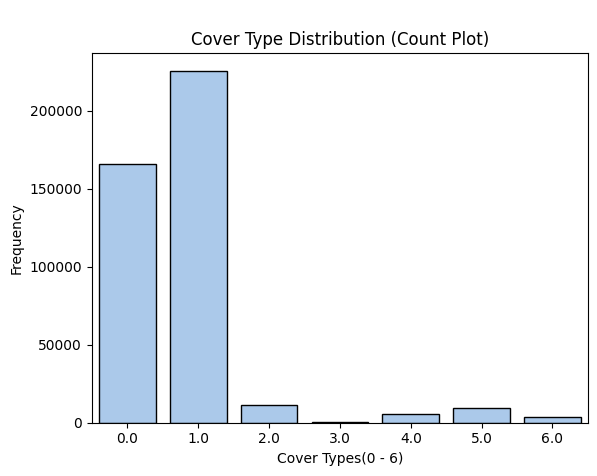

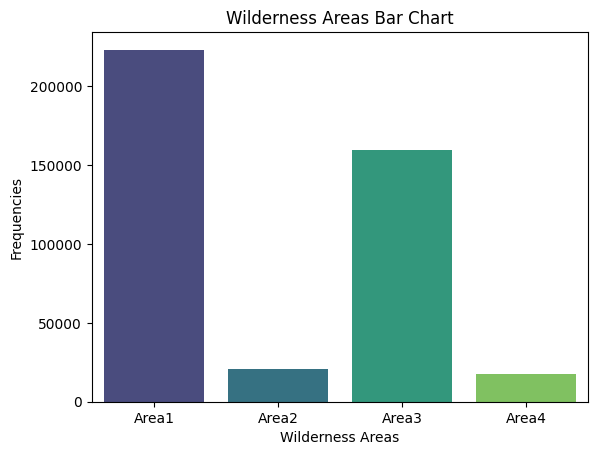

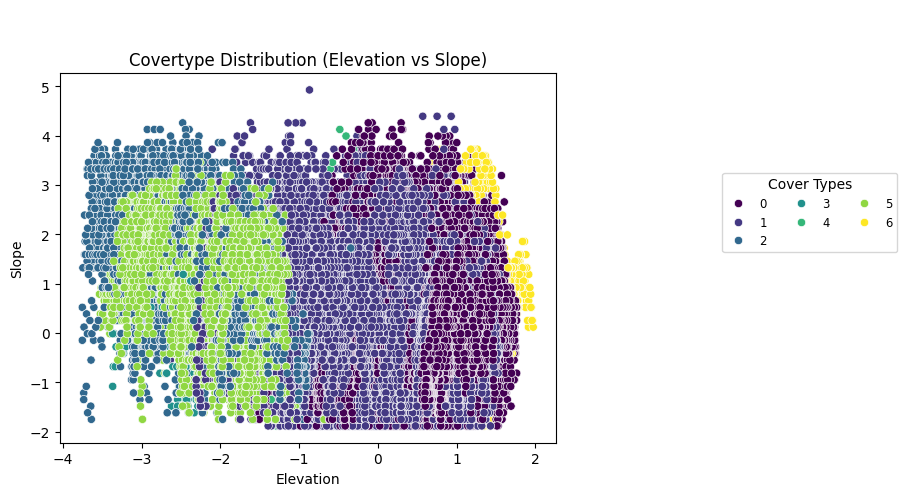

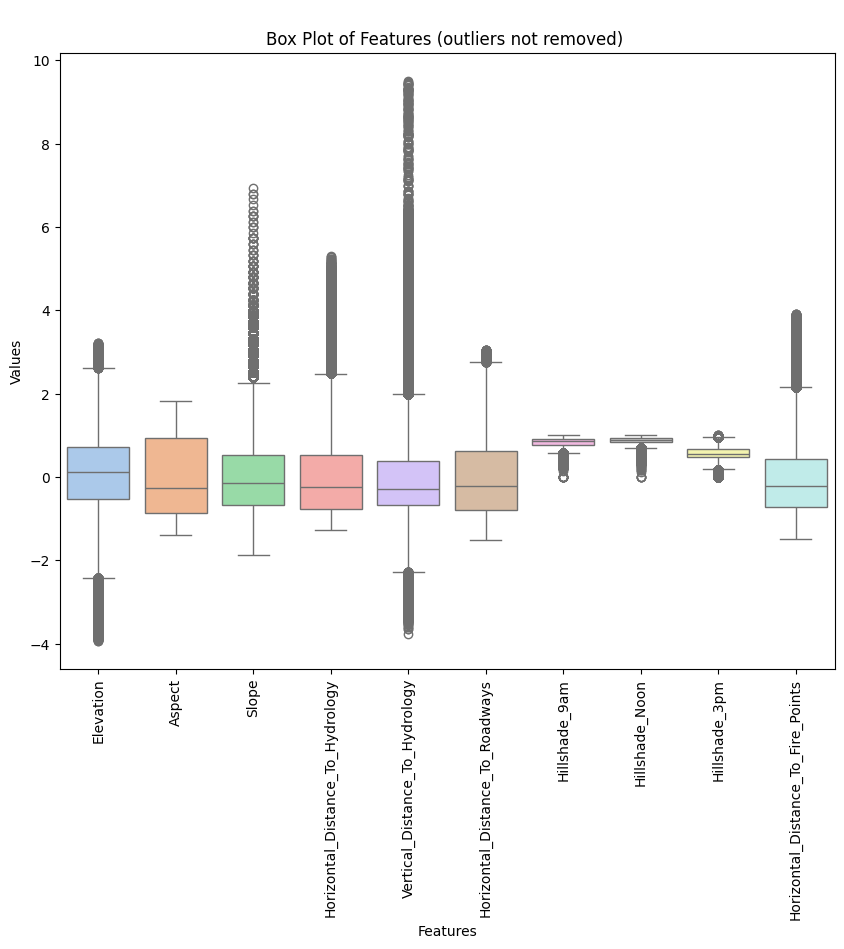

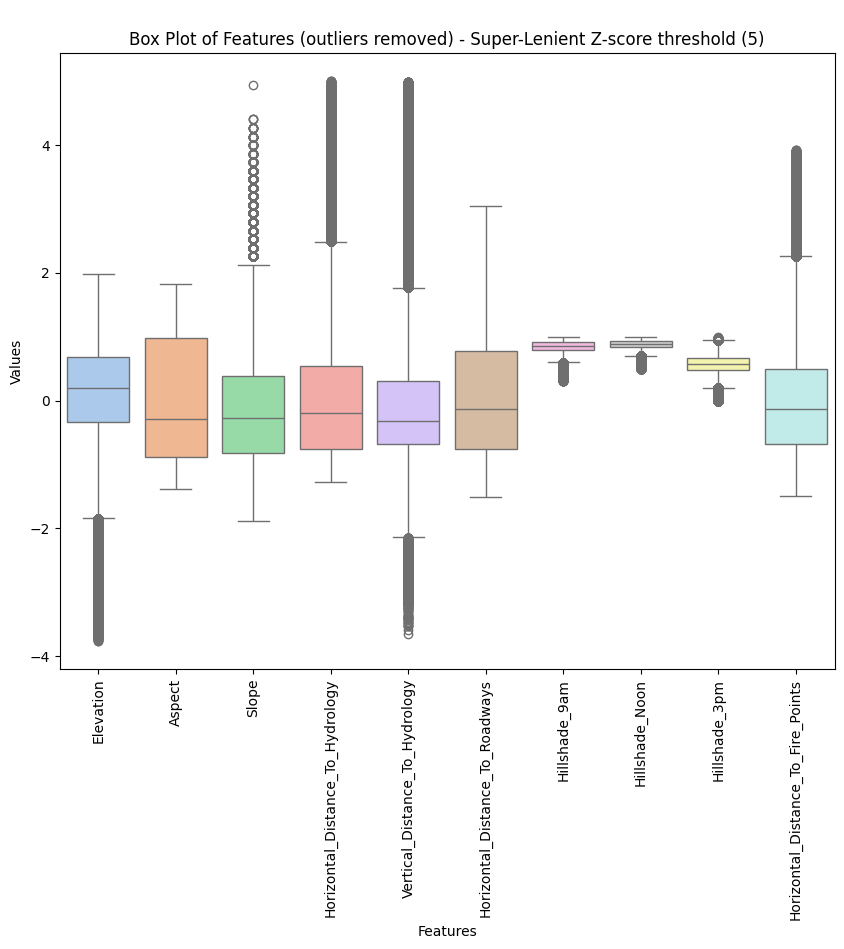

In [38]:
#Reference [Source #1]
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
                                                   #Count Plots
#Count Plot #1
sns.countplot(x='Cover_Type', data=cover_type_data_no_outliers, palette='pastel', hue = 0, legend=False, edgecolor='black')

#Labels
plt.xlabel('Cover Types(0 - 6)')
plt.ylabel('Frequency')
plt.title('\nCover Type Distribution (Count Plot)')

plt.show()

                                                   #Bar Chart
wilderness_areas = ['Area1', 'Area2', 'Area3', 'Area4']
w1 = len(cover_type_data_no_outliers[cover_type_data_no_outliers['Wilderness_Area1'] == 1])
w2 = len(cover_type_data_no_outliers[cover_type_data_no_outliers['Wilderness_Area2'] == 1])
w3 = len(cover_type_data_no_outliers[cover_type_data_no_outliers['Wilderness_Area3'] == 1])
w4 = len(cover_type_data_no_outliers[cover_type_data_no_outliers['Wilderness_Area4'] == 1])

values = [w1, w2, w3, w4]


sns.barplot(x=wilderness_areas, y=values, palette="viridis")

plt.xlabel('Wilderness Areas')
plt.ylabel('Frequencies')
plt.title('Wilderness Areas Bar Chart')

# Show the chart
plt.show()


                                                        #Scatter Plots
#Scatter Plot #1
sns.scatterplot(x='Elevation', y='Slope', hue='Cover_Type', data=cover_type_data_no_outliers, palette='viridis')

#Labels
plt.xlabel('Elevation')
plt.ylabel('Slope')
plt.legend(title='Cover Types', loc = "lower right", fontsize = "small", ncol=3, bbox_to_anchor=[1.7,0.5])
plt.title('\n\nCovertype Distribution (Elevation vs Slope)')

plt.show()


                                                     #Box Plots

#Box Plot #1
plt.figure(figsize=(10, 8))
sns.boxplot(data=cover_type_data.drop(columns=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
                         'Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9',
                         'Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17',
                         'Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25',
                         'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
                         'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type']), palette='pastel')

plt.xticks(rotation=90)

#labels 
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('\nBox Plot of Features (outliers not removed) ')

plt.show()


#Box Plot #2
plt.figure(figsize=(10, 8))
sns.boxplot(data=cover_type_data_no_outliers.drop(columns=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4',
                         'Soil_Type1','Soil_Type2','Soil_Type3','Soil_Type4','Soil_Type5','Soil_Type6','Soil_Type7','Soil_Type8','Soil_Type9',
                         'Soil_Type10','Soil_Type11','Soil_Type12','Soil_Type13','Soil_Type14','Soil_Type15','Soil_Type16','Soil_Type17',
                         'Soil_Type18','Soil_Type19','Soil_Type20','Soil_Type21','Soil_Type22','Soil_Type23','Soil_Type24','Soil_Type25',
                         'Soil_Type26','Soil_Type27','Soil_Type28','Soil_Type29','Soil_Type30','Soil_Type31','Soil_Type32','Soil_Type33',
                         'Soil_Type34','Soil_Type35','Soil_Type36','Soil_Type37','Soil_Type38','Soil_Type39','Soil_Type40','Cover_Type']), palette='pastel')

plt.xticks(rotation=90)

#labels 
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('\nBox Plot of Features (outliers removed) - Super-Lenient Z-score threshold (5)')
plt.show()



# 5. Model Development and Training 

### 5.1 - Decision Tree Model Development and Training.

In [39]:
#Reference [Source #1]
#Apply Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV



#Baseline Model
dt_initial_classifier = DecisionTreeClassifier(criterion='gini', random_state=10)
dt_initial_classifier.fit(X_train,y_train)
dt_initial_y_pred = dt_initial_classifier.predict(X_test)



### 5.2 - Random Forest ML Algorithm Application.

In [40]:
#Reference [Source #1]
#Apply Random Forest
from sklearn.ensemble import RandomForestClassifier

#Baseline Model
rf_initial_classifier = RandomForestClassifier(n_estimators=200, max_depth=None, random_state=10)
rf_initial_classifier.fit(X_train, y_train)
rf_initial_y_pred = rf_initial_classifier.predict(X_test)


### 5.3 - Naive Bayes ML Algorithm Application.

In [41]:
#Reference [Source #1]
#Apply Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB(priors=None)
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)

### 5.4 - SVM ML Algorithm Application.

In [42]:
#Reference [Source #1]
#Apply SVM (Linear Learner)

#from sklearn.svm import SVC
from sklearn.svm import LinearSVC

#Baseline Model
#svm_initial_classifier = SVC(kernel="rbf", C=10, cache_size=7000)
svm_initial_classifier = LinearSVC(random_state=10)
svm_initial_classifier.fit(X_train, y_train)

svm_initial_y_pred = svm_initial_classifier.predict(X_test)

### 5.5: K-NN ML Algorithm Application.

In [43]:
#Reference [Source #1]
#Apply K-NN
from sklearn.neighbors import KNeighborsClassifier

#Baseline Model
knn_initial_classifier = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn_initial_classifier.fit(X_train, y_train)
knn_initial_y_pred = knn_initial_classifier.predict(X_test)


# 6. Model Evaluation 

### 6.1 - Decision Tree Algorithm Evaluation

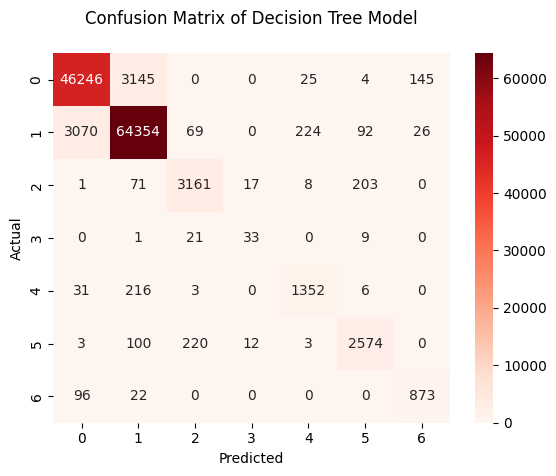



			*** Performance Metrics of Decision Tree Model***

Accuracy:  0.9379686165332658
Precision:  0.8416093656022362
Recall:  0.8451885041991231
F-measure:  0.8432938374644737


In [44]:
#Reference [Source #1]
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


#Confusion Matrices
dt_confusion_matrix_initial = confusion_matrix(dt_initial_y_pred, y_test)
sns.heatmap(dt_confusion_matrix_initial, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Decision Tree Model\n")
plt.show()


#Performance metrics (Accuracy e.t.c)
dt_accuracy_score = accuracy_score(dt_initial_y_pred, y_test)
dt_precision_score = precision_score(dt_initial_y_pred, y_test, average='macro')
dt_recall_score = recall_score(dt_initial_y_pred, y_test, average='macro')
dt_f_score = f1_score(dt_initial_y_pred, y_test, average='macro')

print('\n\n\t\t\t*** Performance Metrics of Decision Tree Model***\n')
print('Accuracy: ', dt_accuracy_score)
print('Precision: ', dt_precision_score)
print('Recall: ', dt_recall_score)
print('F-measure: ', dt_f_score)

### 6.2 - Random Forest Algorithm Evaluation

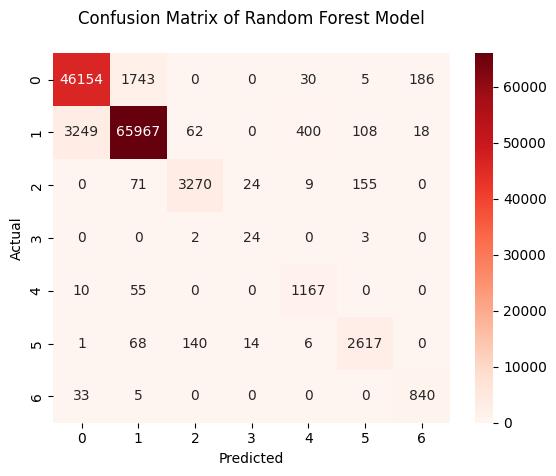



			*** Performance Metrics of Random Forest Model***

Accuracy:  0.9494052326868929
Precision:  0.8096982477437408
Recall:  0.9259865795190293
F-measure:  0.8532967608204742


In [45]:
#Reference [Source #1]

#Confusion Matrices

rf_confusion_matrix_initial = confusion_matrix(rf_initial_y_pred, y_test)
sns.heatmap(rf_confusion_matrix_initial, annot=True, cmap="Reds" , fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Random Forest Model\n")
plt.show()


#Performance metrics (Accuracy e.t.c)
rf_accuracy_score = accuracy_score(rf_initial_y_pred, y_test)
rf_precision_score = precision_score(rf_initial_y_pred, y_test, average='macro')
rf_recall_score = recall_score(rf_initial_y_pred, y_test, average='macro')
rf_f_score = f1_score(rf_initial_y_pred, y_test, average='macro')

print('\n\n\t\t\t*** Performance Metrics of Random Forest Model***\n')
print('Accuracy: ', rf_accuracy_score)
print('Precision: ', rf_precision_score)
print('Recall: ', rf_recall_score)
print('F-measure: ', rf_f_score)

### 6.3 - Naive Bayes ML Algorithm Evaluation.

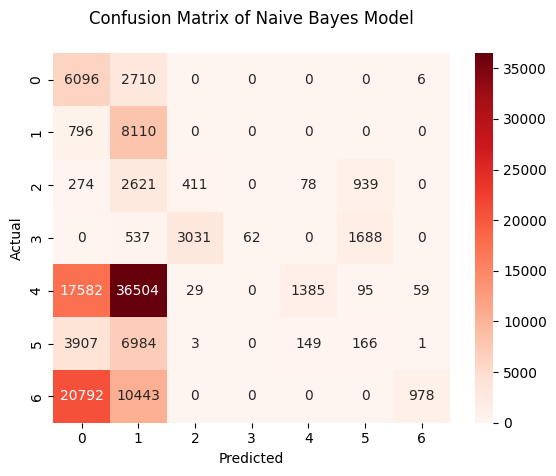



			*** Performance Metrics of Naive Bayes Model***

Accuracy:  0.13610047771204403
Precision:  0.4592082058982468
Recall:  0.25417027007060816
F-measure:  0.09709106273806682


In [46]:
#Reference [Source #1]

#Confusion Matrices
nb_confusion_matrix = confusion_matrix(nb_y_pred, y_test)

sns.heatmap(nb_confusion_matrix, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of Naive Bayes Model\n")


plt.show()

#Performance metrics (Accuracy e.t.c)
nb_accuracy_score = accuracy_score(nb_y_pred, y_test)
nb_precision_score = precision_score(nb_y_pred, y_test, average='macro')
nb_recall_score = recall_score(nb_y_pred, y_test, average='macro')
nb_f_score = f1_score(nb_y_pred, y_test, average='macro')

print('\n\n\t\t\t*** Performance Metrics of Naive Bayes Model***\n')
print('Accuracy: ', nb_accuracy_score)
print('Precision: ', nb_precision_score)
print('Recall: ', nb_recall_score)
print('F-measure: ', nb_f_score)

### 6.4 - SVM ML Algorithm Evaluation.

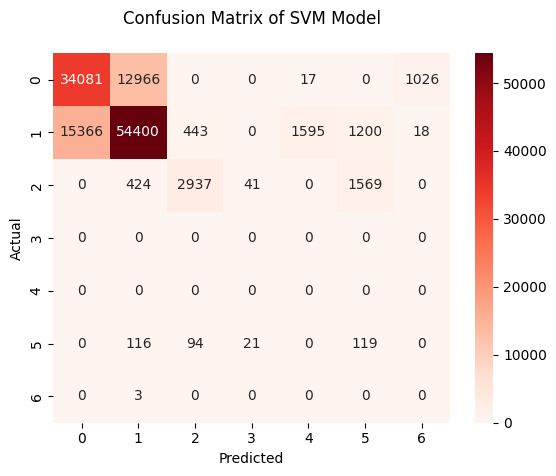



			*** Performance Metrics of SVM Model***

Accuracy:  0.7239789300515675
Precision:  0.33956331146324986
Recall:  0.34064282797435175
F-measure:  0.319986128546546


In [47]:
#Reference [Source #1]

#Confusion Matrices

svm_confusion_matrix_initial = confusion_matrix(svm_initial_y_pred, y_test)
sns.heatmap(svm_confusion_matrix_initial, annot=True, cmap="Reds", fmt='.0f')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of SVM Model\n")
plt.show()

#Performance metrics (Accuracy e.t.c)
svm_accuracy_score = accuracy_score(svm_initial_y_pred, y_test)
svm_precision_score = precision_score(svm_initial_y_pred, y_test, average='macro')
svm_recall_score = recall_score(svm_initial_y_pred, y_test, average='macro')
svm_f_score = f1_score(svm_initial_y_pred, y_test, average='macro')

print('\n\n\t\t\t*** Performance Metrics of SVM Model***\n')
print('Accuracy: ', svm_accuracy_score)
print('Precision: ', svm_precision_score)
print('Recall: ', svm_recall_score)
print('F-measure: ', svm_f_score)

### 6.5: K-NN Algorithm Evaluation.

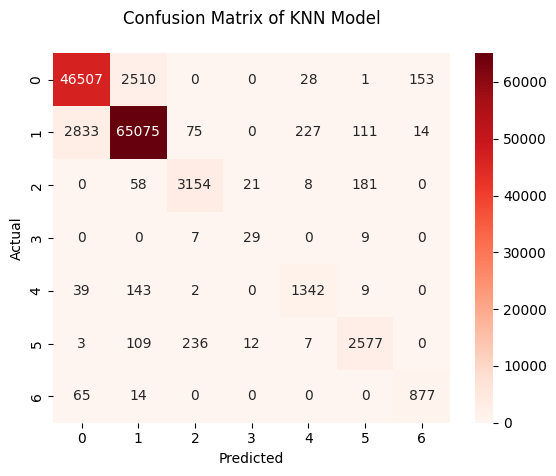



			*** Performance Metrics of KNN Model***

Accuracy:  0.9456246638615584
Precision:  0.8341852449972261
Recall:  0.8758108213523565
F-measure:  0.8526554641590129


In [48]:
#Reference [Source #1]
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Confusion Matrices

knn_confusion_matrix_initial = confusion_matrix(knn_initial_y_pred, y_test)
sns.heatmap(knn_confusion_matrix_initial, annot=True, cmap="Reds", fmt='.0f')


plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix of KNN Model\n")
plt.show()

#Performance metrics (Accuracy e.t.c)
knn_accuracy_score = accuracy_score(knn_initial_y_pred, y_test)
knn_precision_score = precision_score(knn_initial_y_pred, y_test, average='macro')
knn_recall_score = recall_score(knn_initial_y_pred, y_test, average='macro')
knn_f_score = f1_score(knn_initial_y_pred, y_test, average='macro')

print('\n\n\t\t\t*** Performance Metrics of KNN Model***\n')
print('Accuracy: ', knn_accuracy_score)
print('Precision: ', knn_precision_score)
print('Recall: ', knn_recall_score)
print('F-measure: ', knn_f_score)



# 7. Analysis


### 7.1 Analysis of all Algorithms based on performance metrics.

Unlike the small and large datasets (wine dataset, nursery dataset), when considering the five Machine Learning algorithms used in my experiments for the extra large dataset amongst all three used in my experiments (cover type dataset - 581,012  instances), the results varied but were more similar to the results achieved on the nursery dataset. On this dataset, the Random Forest algorithm had the highest accuracy and F-Scores with scores of 94.9% and 85.3% respectively Whereas the Decision Tree algorithm had accuracy and F-Scores of 93.7% and 84.5%. Though, on this dataset, Random Forest scored 80.9% on precision and 92.5% on recall whereas Decision Tree scored 84% on both metrics. KNN was quite competitive in comparison to Decision Tree and Random Forest as it yielded  accuracy, precision, recall and F-Scores of 94.6%, 83.4%, 87.5% and 85.2%. Unlike the previous two dataset, the SVM algorithm had a significantly lower performance as did the Naive Bayes algorithm. SVM bolstered a 72.3% accuracy but scored less than 35% on precision, recall and F1 Scores and Naive Bayes showed a 13.6% accuracy thus making these two the least desirable algorithms for this dataset. When providing a recommendation, based on the metrics, Random Forest would be the most desirable as it shows the highest accuracy and the best balance between precision and recall scores.


### References:

1. Chatgpt (no date) ChatGPT. Available at: https://openai.com/chatgpt (Accessed: 07 November 2023).
2. https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html